In [1]:
## Boiler plate code common to many notebooks.  See the TestFilesCommonCode.ipynb for details
from __future__ import print_function
%run TestFilesCommonCode.ipynb

SimpleITK Version: 0.9.1
Compiled: Sep 28 2015 10:07:41



In [2]:
import scipy.io

In [74]:
t1=sitk.Image(256,256,sitk.sitkUInt8)
t2=sitk.Image(256,256,sitk.sitkUInt8)

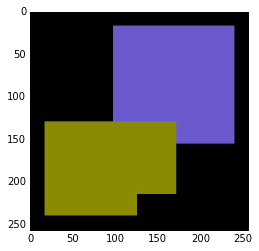

In [75]:
# create modality 1
#
t1_arr=sitk.GetArrayFromImage(t1)
t1_arr[17:129,97:239]=50 # tissue A or c
t1_arr[129:155,171:239]=50 # tissue A or C
t1_arr[129:239,17:171]=250 # tissue B
t1_arr[214:255,125:255]=0
#
t1=sitk.GetImageFromArray(t1_arr)
myshow(sitk.LabelToRGB(t1))

In [76]:
sitk.WriteImage(t1,os.path.join('/raid0/homes/aghayoor/Desktop/phantom','t1.nii.gz'))
scipy.io.savemat(os.path.join('/raid0/homes/aghayoor/Desktop/phantom','t1.mat'), mdict={'t1': t1_arr})

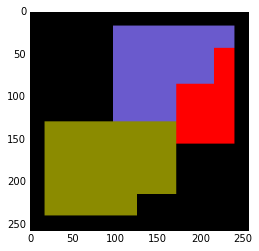

In [77]:
# create modality 2
#
t2_arr=sitk.GetArrayFromImage(t2)
t2_arr[17:129,97:239]=200 # tissue A
t2_arr[129:239,17:171]=100 # tissue B
t2_arr[214:255,125:255]=0
t2_arr[43:129,171:239]=150 # tissue C
t2_arr[129:155,171:239]=150 # tissue C
t2_arr[43:85,171:215]=200 # tissue A
#
#
t2=sitk.GetImageFromArray(t2_arr)
myshow(sitk.LabelToRGB(t2))

In [78]:
sitk.WriteImage(t2,os.path.join('/raid0/homes/aghayoor/Desktop/phantom','t2.nii.gz'))
scipy.io.savemat(os.path.join('/raid0/homes/aghayoor/Desktop/phantom','t2.mat'), mdict={'t2': t2_arr})

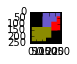

In [79]:
t2_lr = sitk.Shrink(t2,[7,7])
myshow(sitk.LabelToRGB(t2_lr))

In [80]:
t2_lr_arr=sitk.GetArrayFromImage(t2_lr)

In [81]:
scipy.io.savemat(os.path.join('/raid0/homes/aghayoor/Desktop/phantom','t2_lr.mat'), mdict={'t2_lr': t2_lr_arr})

In [82]:
print(t2_lr.GetSize())
print(t2_lr.GetSpacing())

(36, 36)
(7.0, 7.0)


In [83]:
sitk.WriteImage(t2_lr,os.path.join('/raid0/homes/aghayoor/Desktop/phantom','t2_lr.nii.gz'))